#CHALLENGE 2: Clasificación con Bayes y KNN

**Estudiante: Daniel Ivan Zavaleta Guzmán**

##Introducción

- Problemática

La resistencia a los antimicrobianos es una preocupación de salud pública, con el potencial de causar graves consecuencias en el tratamiento de infecciones bacterianas. Uno de los enfoques para abordar este problema es el desarrollo de nuevos agentes antimicrobianos con mecanismos de acción que puedan superar los mecanismos de resistencia bacteriana existentes.

Los sideróforos, compuestos orgánicos producidos por microorganismos, han demostrado tener propiedades antimicrobianas en estudios preclínicos. Sin embargo, su eficacia clínica como agentes terapéuticos aún no ha sido completamente explorada. Una de las principales limitaciones para su aplicación clínica es la falta de comprensión sobre las características estructurales que contribuyen a su actividad antimicrobiana.

Por lo tanto, sería útil identificar las características estructurales de los sideróforos, como la presencia de grupos funcionales específicos, geometría molecular, entre otros descriptores químicos. Esto podría proporcionar información valiosa para el diseño y desarrollo de nuevos agentes antimicrobianos basados en sideróforos con mayor eficacia clínica.

Referencia:

Saha, M., Sarkar, S., Sarkar, B. et al. Microbial siderophores and their potential applications: a review. Environ Sci Pollut Res 23, 3984–3999 (2016). https://doi.org/10.1007/s11356-015-4294-0


##Metodología

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

###Obtención de base de datos

In [2]:
#BBDD inicial de sideroforos
df = pd.read_csv("https://raw.githubusercontent.com/inefable12/siderophores_database/main/Siderophore_DB.csv", index_col="ID")
df

,Compounds,Microorganism,hydroxamate,catecholate,a-hydroxycarboxylate,carboxylate,phenolate,citrate,other,SMILES,validate smiles,SMARTS,SELFIES
ID,,,,,,,,,,,,,
1,"2,3-dihydroxybenzoic acid","Azobacter vinelandii, Azospirillum lipoferum, ...",0,1,0,1,0,0,0,OC(=O)c1c(O)c(O)ccc1,True,[#8]-[#6](=[#8])-[#6]1:[#6](-[#8]):[#6](-[#8])...,[O][C][=Branch1][C][=O][C][=C][Branch1][C][O][...
2,"2,3-dihydroxybenzoylglycine",Bacillus subtilis,0,1,0,1,0,0,0,c1ccc(O)c(O)c1C(=O)NCC(O)=O,True,[#6]1:[#6]:[#6]:[#6](-[#8]):[#6](-[#8]):[#6]:1...,[C][=C][C][=C][Branch1][C][O][C][Branch1][C][O...
3,"2,3-dihydroxybenzoylserine","Aerobacter aerogenes, Escherichia ST2, Escheri...",0,1,0,1,0,0,0,OC[C@@H](C(O)=O)NC(=O)c1c(O)c(O)ccc1,True,[#8]-[#6]-[#6@@H](-[#6](-[#8])=[#8])-[#7]-[#6]...,[O][C][C@@H1][Branch1][=Branch1][C][Branch1][C...
4,"2,3-dihydroxybenzoylthreonine",Klebsiella oxytoca,0,1,0,1,0,0,0,O[C@H](C)[C@@H](C(O)=O)NC(=O)c1cccc(O)c1O,True,[#8]-[#6@H](-[#6])-[#6@@H](-[#6](-[#8])=[#8])-...,[O][C@H1][Branch1][C][C][C@@H1][Branch1][=Bran...
5,2-hydroxybenzoic acid,"Azospirillum lipoferum, Burkholderia cepacia",0,0,0,1,1,0,0,OC(=O)c1c(O)cccc1,True,[#8]-[#6](=[#8])-[#6]1:[#6](-[#8]):[#6]:[#6]:[...,[O][C][=Branch1][C][=O][C][=C][Branch1][C][O][...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,Desferriastechrome,NaN,2,0,0,0,0,0,0,O=c1c(C)nc(OC)c(n1O)Cc2c[nH]c(c23)c(ccc3)CC=C(C)C,True,[#8]=[#6]1:[#6](-[#6]):[#7]:[#6](-[#8]-[#6]):[...,[O][=C][C][Branch1][C][C][=N][C][Branch1][Ring...
278,Fetroja,NaN,0,1,0,2,0,0,1,c1cc(O)c(O)c(Cl)c1C(=O)NCC[N+]2(CCCC2)CC(=C3C(...,True,[#6]1:[#6]:[#6](-[#8]):[#6](-[#8]):[#6](-[#17]...,[C][=C][C][Branch1][C][O][=C][Branch1][C][O][C...
279,Cefiderocol,NaN,0,1,0,2,0,0,1,c1cc(O)c(O)c(Cl)c1C(=O)NCC[N+]2(CCCC2)CC(=C3C(...,True,[#6]1:[#6]:[#6](-[#8]):[#6](-[#8]):[#6](-[#17]...,[C][=C][C][Branch1][C][O][=C][Branch1][C][O][C...


La cantidad de los grupos funcionales **hydroxamate	catecholate	a-hydroxycarboxylate	carboxylate	phenolate	citrate	other** son los targets en esta base de datos.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 221 entries, 1 to 281
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Compounds             221 non-null    object
 1   Microorganism         149 non-null    object
 2   hydroxamate           221 non-null    int64 
 3   catecholate           221 non-null    int64 
 4   a-hydroxycarboxylate  221 non-null    int64 
 5   carboxylate           221 non-null    int64 
 6   phenolate             221 non-null    int64 
 7   citrate               221 non-null    int64 
 8   other                 221 non-null    int64 
 9   SMILES                221 non-null    object
 10  validate smiles       221 non-null    bool  
 11  SMARTS                221 non-null    object
 12  SELFIES               221 non-null    object
dtypes: bool(1), int64(7), object(5)
memory usage: 22.7+ KB


Como solo se necesitan la cantidad de los grupos funcionales mencionados, hay que extraerlos.

In [4]:
cols_grupos_f = ["hydroxamate","catecholate","a-hydroxycarboxylate","carboxylate","phenolate","citrate","other"]
df = df[cols_grupos_f]
df.shape

(221, 7)

Se verifica si hay columnas con valores nulos.

In [5]:
df.isnull().sum()

hydroxamate             0
catecholate             0
a-hydroxycarboxylate    0
carboxylate             0
phenolate               0
citrate                 0
other                   0
dtype: int64

Se verifica los valores que existen en cada columna.

In [6]:
for col in df.columns:
    print(f"{col} : {df[col].unique()}")

hydroxamate : [0 3 2 1 4]
catecholate : [1 0 3 2]
a-hydroxycarboxylate : [0 2 1]
carboxylate : [1 0 2 4 3]
phenolate : [0 1 2]
citrate : [0 1 2]
other : [0 1]


Con esto ya se sabe el rango de valores que puede tomar cada columna y que no hay valores nulos.

In [7]:
#BBDD con los features de los sideroforos
df1 = pd.read_csv("https://raw.githubusercontent.com/inefable12/siderophores_database/main/Siderophore_DB1.csv", index_col="ID")
df1

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,MaxPartialCharge,...,fr_NH0,fr_NH1,fr_NH2,fr_N_O,fr_amide,fr_benzene,fr_ester,fr_para_hydroxylation,fr_phenol,fr_phenol_noOrthoHbond
ID,,,,,,,,,,,,,,,,,,,,,
1,11.191262,-1.343472,11.191262,0.665370,0.522491,154.121,148.073,154.026609,58,0.339119,...,0,0,0,0,0,1,0,1,2,1
2,12.228676,-3.436129,12.228676,0.586755,0.522624,211.173,202.101,211.048072,80,0.322481,...,0,1,0,0,1,1,0,1,2,2
3,12.627825,-3.816337,12.627825,0.758838,0.442264,241.199,230.111,241.058637,92,0.328131,...,0,1,0,0,1,1,0,1,2,2
4,12.854441,-4.102795,12.854441,0.884463,0.468346,255.226,242.122,255.074287,98,0.328426,...,0,1,0,0,1,1,0,1,2,2
5,11.108779,-1.310880,11.108779,0.630759,0.610259,138.122,132.074,138.031694,52,0.338969,...,0,0,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,13.053345,-3.721588,13.053345,0.123679,0.544261,353.422,330.238,353.173942,136,0.327527,...,2,1,0,0,0,1,0,1,0,0
278,14.672799,-5.563063,14.672799,0.044514,0.049920,753.236,717.956,752.156986,268,0.352359,...,4,2,1,0,3,1,0,0,2,2
279,14.672799,-5.563063,14.672799,0.044514,0.049920,753.236,717.956,752.156986,268,0.352359,...,4,2,1,0,3,1,0,0,2,2


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 221 entries, 1 to 281
Columns: 118 entries, MaxEStateIndex to fr_phenol_noOrthoHbond
dtypes: float64(86), int64(32)
memory usage: 205.5+ KB


Se corrobora que no se tiene valores nulos, para no eliminar ninguna columna de los features del dataset.

In [9]:
sum(df1.isna().any() )

0

Además, para este caso, no es necesario verificar los valores únicos en los features.

###Pre procesamiento de datos

Se verifica con datos estadisticos la distribucion de la data.

In [10]:
df1.describe([0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]).T #medidas estadisticas de la data

,count,mean,std,min,10%,25%,50%,75%,90%,95%,99%,max
MaxEStateIndex,221.0,14.361458,1.306650,9.667832,12.844865,13.693037,14.222851,15.424962,16.014459,16.414777,16.553503,16.647474
MinEStateIndex,221.0,-5.557024,1.186967,-7.433673,-6.971591,-6.290073,-5.571034,-5.211695,-4.111759,-3.352856,-1.331496,-0.881916
MaxAbsEStateIndex,221.0,14.361458,1.306650,9.667832,12.844865,13.693037,14.222851,15.424962,16.014459,16.414777,16.553503,16.647474
MinAbsEStateIndex,221.0,1.244646,0.508051,0.011382,0.516690,1.036932,1.280840,1.618549,1.823396,2.003198,2.086119,2.220550
qed,221.0,0.151045,0.203659,0.007004,0.020059,0.030619,0.058700,0.158075,0.490353,0.636765,0.806440,0.881757
...,...,...,...,...,...,...,...,...,...,...,...,...
fr_benzene,221.0,0.782805,1.090402,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,3.000000,3.000000,4.000000
fr_ester,221.0,0.325792,0.727833,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000,3.000000
fr_para_hydroxylation,221.0,0.588235,0.985184,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000,3.000000,3.000000
fr_phenol,221.0,1.312217,2.010718,0.000000,0.000000,0.000000,0.000000,2.000000,4.000000,6.000000,6.000000,6.000000


Para detectar redundancia entre features, y también reducir dimensionalidad, se usa una matriz de correlación.

<Axes: >

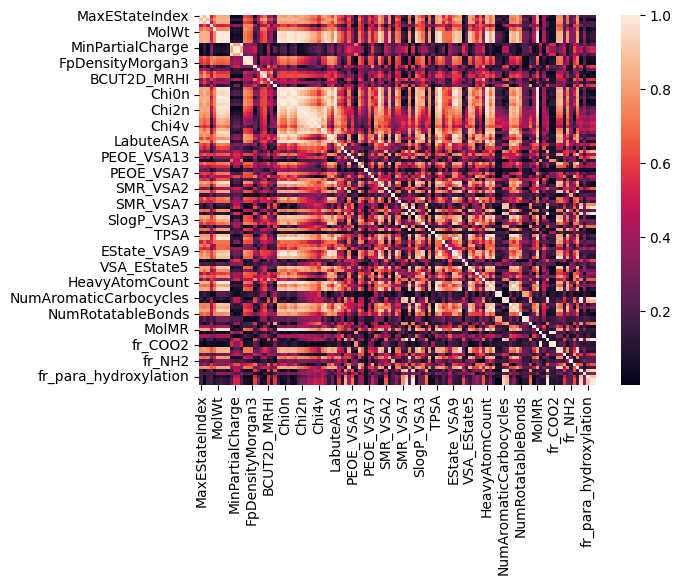

In [11]:
plt.figure()
sns.heatmap(df1.corr().abs())

Se extraen los features con correlacion mayor a 0.9 para no tener redundancia.

In [12]:
corr_mat = df1.corr()
columns = np.full((corr_mat.shape[0], ), True, dtype=bool)
for i in range(corr_mat.shape[0]):
    for j in range(i+1, corr_mat.shape[0]):
        if corr_mat.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = df1.columns[columns]
df1_filtered = df1[selected_columns]
df1_filtered

,MaxEStateIndex,MinEStateIndex,MinAbsEStateIndex,qed,MolWt,MaxPartialCharge,MinPartialCharge,MaxAbsPartialCharge,FpDensityMorgan1,BCUT2D_MWHI,...,NumSaturatedHeterocycles,RingCount,MolLogP,fr_Al_COO,fr_Al_OH,fr_NH0,fr_NH2,fr_N_O,fr_ester,fr_para_hydroxylation
ID,,,,,,,,,,,,,,,,,,,,,
1,11.191262,-1.343472,0.665370,0.522491,154.121,0.339119,-0.504241,0.504241,1.272727,12.704327,...,0,1,0.79600,0,0,0,0,0,0,1
2,12.228676,-3.436129,0.586755,0.522624,211.173,0.322481,-0.504242,0.504242,1.400000,12.609118,...,0,1,-0.08780,1,0,0,0,0,0,1
3,12.627825,-3.816337,0.758838,0.442264,241.199,0.328131,-0.504242,0.504242,1.352941,11.812415,...,0,1,-0.72690,1,1,0,0,0,0,1
4,12.854441,-4.102795,0.884463,0.468346,255.226,0.328426,-0.504242,0.504242,1.333333,11.309400,...,0,1,-0.33840,1,1,0,0,0,0,1
5,11.108779,-1.310880,0.630759,0.610259,138.122,0.338969,-0.507053,0.507053,1.400000,11.839697,...,0,1,1.09040,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,13.053345,-3.721588,0.123679,0.544261,353.422,0.327527,-0.479640,0.479640,1.346154,10.480402,...,0,3,3.37842,0,0,2,0,0,0,1
278,14.672799,-5.563063,0.044514,0.049920,753.236,0.352359,-0.504221,0.504221,1.180000,11.853578,...,2,5,1.15300,2,0,4,1,0,0,0
279,14.672799,-5.563063,0.044514,0.049920,753.236,0.352359,-0.504221,0.504221,1.180000,11.853578,...,2,5,1.15300,2,0,4,1,0,0,0


Se redujo la cantidad de features de 118 a 62.

<Axes: >

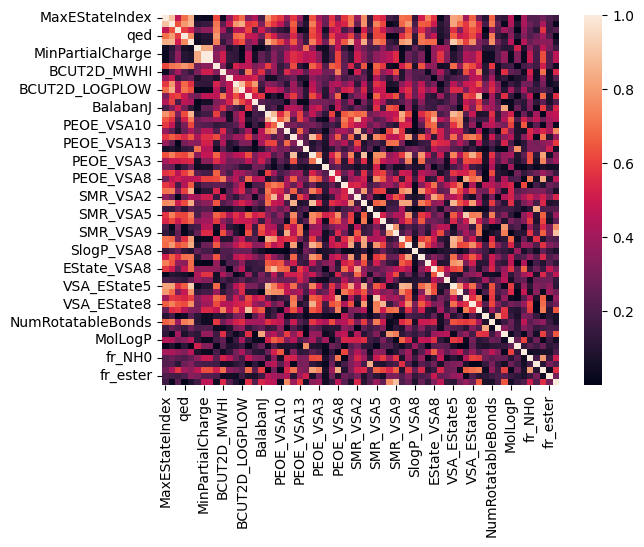

In [13]:
sns.heatmap(df1_filtered.corr().abs(), annot=False)

In [14]:
df1_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 221 entries, 1 to 281
Data columns (total 62 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MaxEStateIndex            221 non-null    float64
 1   MinEStateIndex            221 non-null    float64
 2   MinAbsEStateIndex         221 non-null    float64
 3   qed                       221 non-null    float64
 4   MolWt                     221 non-null    float64
 5   MaxPartialCharge          221 non-null    float64
 6   MinPartialCharge          221 non-null    float64
 7   MaxAbsPartialCharge       221 non-null    float64
 8   FpDensityMorgan1          221 non-null    float64
 9   BCUT2D_MWHI               221 non-null    float64
 10  BCUT2D_MWLOW              221 non-null    float64
 11  BCUT2D_CHGLO              221 non-null    float64
 12  BCUT2D_LOGPLOW            221 non-null    float64
 13  BCUT2D_MRHI               221 non-null    float64
 14  BCUT2D_MRLOW   

Para realizar la clasificación en base a targets, se siguen dos métodos:


*  Método 1: Utilizando todas la columnas de los targets, pero solo la ausencia o presencia de estos grupos funcionales
*  Método 2: Utilizando todas las columnas de los targets, y teniendo en cuenta la cantidad de grupos funcionales




**Método 1**

Se convierten los valores de cantidad de grupos funcionales (targets) en 0s y 1s.

Cada dígito binario  se debe interpretar la presencia (1) o ausencia (0) de un target específico.

In [15]:
y0 = df.applymap(lambda x: 1 if x > 0 else x)
y0

,hydroxamate,catecholate,a-hydroxycarboxylate,carboxylate,phenolate,citrate,other
ID,,,,,,,
1,0,1,0,1,0,0,0
2,0,1,0,1,0,0,0
3,0,1,0,1,0,0,0
4,0,1,0,1,0,0,0
5,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...
277,1,0,0,0,0,0,0
278,0,1,0,1,0,0,1
279,0,1,0,1,0,0,1


Ahora, se combinan los nros binarios en un solo nro decimal, para representar la presencia o ausencia de los diferentes targets de manera conjunta en una sola columna.

Y esto sirve para reducir la dimensionalidad de los datos al combinar multiples variables (los targets) en una sola variable.


In [16]:
def convert_to_output(number_list):
    return int("".join(map(str, number_list)), 2)

decoded = y0.apply(convert_to_output, axis=1)
y0 = pd.DataFrame(decoded, columns=["decoded"])
y0

,decoded
ID,
1,40
2,40
3,40
4,40
5,12
...,...
277,64
278,41
279,41


Se visualiza la representación de los targets en conjunto con un gráfico de barras.

<Axes: xlabel='decoded'>

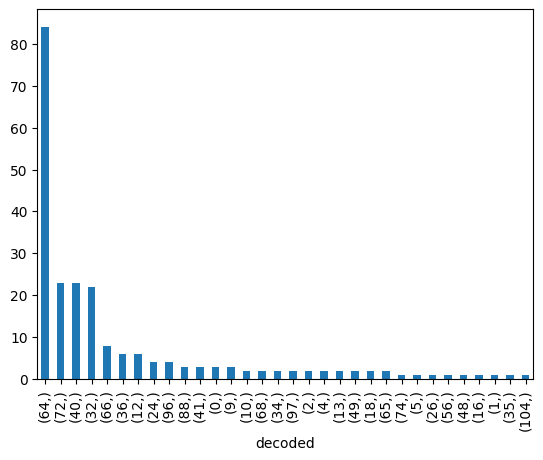

In [17]:
y0.value_counts().plot(kind="bar")

Se eliminan las muestras (filas) que pertenecen a clases que se repiten menos de 5 veces, ya que esto se considera como una fuente de error, y se visualiza el nuevo gráfico de barras.

<Axes: xlabel='decoded'>

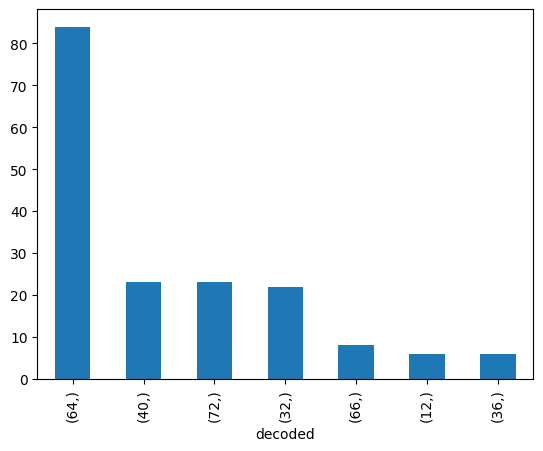

In [18]:
counts = y0["decoded"].value_counts()
new_values = counts[counts >= 5].index.to_list()
mask0 = y0["decoded"].isin(new_values)
y0 = y0[mask0]
y0.value_counts().plot(kind="bar") #grafico de barras

Se obtiene 7 clases específicas según la presencia o ausencia de los grupos funcionales.



**Método 2**

In [19]:
y1 = df
def convert_to_output(number_list):
    return int("".join(map(str, number_list)), 10)
decoded = y1.apply(convert_to_output, axis=1)
y1 = pd.DataFrame(decoded, columns=["decoded"])
y1

,decoded
ID,
1,101000
2,101000
3,101000
4,101000
5,1100
...,...
277,2000000
278,102001
279,102001


<Axes: xlabel='decoded'>

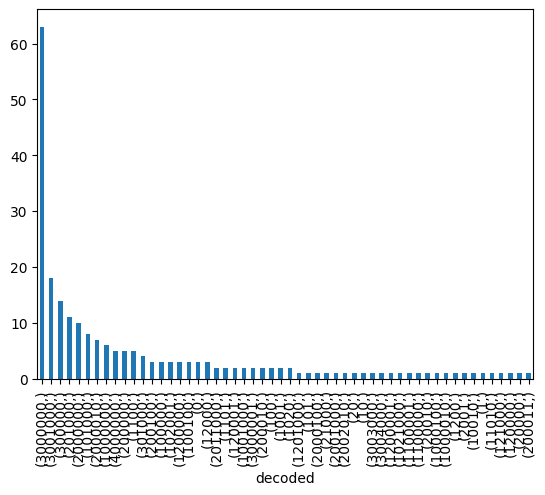

In [20]:
y1.value_counts().plot(kind="bar")

Se eliminan también las clases con menos de 5 repeticiones.

<Axes: xlabel='decoded'>

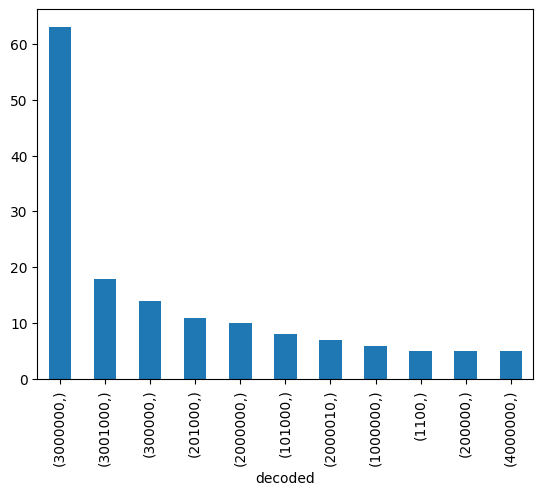

In [21]:
counts = y1["decoded"].value_counts()
new_values = counts[counts >= 5].index.to_list()
mask1 = y1["decoded"].isin(new_values)
y1 = y1[mask1]
y1.value_counts().plot(kind="bar")

Se obtienen 11 clases específicas según la cantidad de grupos funcionales.

###Entrenamiento de modelos de clasificación con ML

Los modelos de clasificación tratados en clase fueron K-Nearest Neighbors (KNN) y Naive Bayes, por lo tanto, esos son los que se usan en este challenge.

**Método 1**

In [22]:
X0_train, X0_test, y0_train, y0_test = train_test_split(df1_filtered[mask0], y0, test_size=0.2, random_state=42)
X0_train.shape, X0_test.shape, y0_train.shape, y0_test.shape

((137, 62), (35, 62), (137, 1), (35, 1))

In [23]:
model_list = [KNeighborsClassifier(), GaussianNB()]
model_name_list = ["KNN", "NB"]
acc = []

In [24]:
for model in model_list:
    model.fit(X0_train, y0_train)
    y_pred = model.predict(X0_test)
    acc.append(accuracy_score(y0_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [25]:
performance_df = pd.DataFrame(index = ["Accuracy"],columns = model_name_list,data=[acc]).T
pd.options.display.precision = 3
performance_df

,Accuracy
KNN,0.543
NB,0.829


**Método 2**

In [26]:
X1_train, X1_test, y1_train, y1_test = train_test_split(df1_filtered[mask1], y1, test_size=0.2, random_state=42)
X1_train.shape, X1_test.shape, y1_train.shape, y1_test.shape

((121, 62), (31, 62), (121, 1), (31, 1))

In [27]:
model_list = [KNeighborsClassifier(), GaussianNB()]
model_name_list = ["KNN", "NB"]
acc = []

In [28]:
for model in model_list:
    model.fit(X1_train, y1_train)
    y_pred = model.predict(X1_test)
    acc.append(accuracy_score(y1_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [29]:
performance_df = pd.DataFrame(index = ["Accuracy"],columns = model_name_list,data=[acc]).T
pd.options.display.precision = 3
performance_df

,Accuracy
KNN,0.710
NB,0.774


###Tuneo de hiperparámetros

**Para el método 1**

En este método, de los resultados anteriores, se observa que el clasificador Naive Bayes tuvo los mejores resultados, y se utilizará para el tuneo de hiperparametros, a pesar de que solo cuente con 1 parametro a modificar.

In [30]:
X0_train, X0_test, y0_train, y0_test = train_test_split(df1_filtered[mask0], y0, test_size=0.2, random_state=42)
X0_train.shape, X0_test.shape, y0_train.shape, y0_test.shape

((137, 62), (35, 62), (137, 1), (35, 1))

In [31]:
model0 = GaussianNB()

In [32]:
# Espacio de hiperparámetros para explorar
param_distributions = {
    'var_smoothing': np.logspace(0, -9, num=100)
}

In [33]:
# Configuración de RandomizedSearchCV
model0_random = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_distributions,
    n_iter=300,  #esto es ajustable
    cv=4,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Ajuste del modelo
model0_random.fit(X0_train, y0_train)

Fitting 4 folds for each of 100 candidates, totalling 400 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 100 is smaller than n_iter=300. Running 100 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomizedSearchCV(cv=4, estimator=GaussianNB(), n_iter=300, n_jobs=-1,
                   param_distributions={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-0...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
                   random_state=42, verbose=2)

In [34]:
model0_random.best_params_ #mejores parametros

{'var_smoothing': 1.873817422860383e-08}

In [35]:
model0_random.best_score_ #mejor puntuacion

0.8096638655462184

In [36]:
base_model = GaussianNB().fit(X0_train, y0_train)
base_accuracy = accuracy_score(y0_test, base_model.predict(X0_test))
print(f"Rendimiento del modelo base: {base_accuracy*100:.3f}%")

best_random = model0_random.best_estimator_
best_random_accuracy = accuracy_score(y0_test, best_random.predict(X0_test))
print(f"Rendimiento del mejor modelo aleatorio: {best_random_accuracy*100:.3f}%")

Rendimiento del modelo base: 82.857%
Rendimiento del mejor modelo aleatorio: 74.286%


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Como la precisión es más baja con el modelo aleatorio que con el modelo base, se utiliza GridSearchCV para verificar si es posible aumentar la precisión.



In [37]:
model0 = GaussianNB()

In [38]:
# Definición del espacio de hiperparámetros para explorar
param_grid = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

In [39]:
# Configuración de GridSearchCV
grid_search = GridSearchCV(estimator=model0, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X0_train, y0_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.8480358...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=2)

In [40]:
# Mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", grid_search.best_params_)

# Mejor puntuación obtenida
print("Mejor puntuación:", grid_search.best_score_)

Mejores hiperparámetros: {'var_smoothing': 1.519911082952933e-08}
Mejor puntuación: 0.7873015873015873


In [41]:
# Evaluación en el conjunto de prueba
best_grid = grid_search.best_estimator_
y_pred = best_grid = grid_search.best_estimator_.predict(X0_test)
test_accuracy = accuracy_score(y0_test, y_pred)
print(f"Rendimiento en el conjunto de prueba: {test_accuracy*100:.2f}%")

Rendimiento en el conjunto de prueba: 74.29%


Se observa que no se ha podido obtener una precisión mayor al usar GridSearchCV para el tuneo de hiperparámetros. Por lo tanto, se usa el hiperparámetro predeterminado.

In [42]:
best_model0 = GaussianNB()
best_model0.fit(X0_train, y0_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

**Para método 2**

Como se observó en los resultados iniciales de este método, con el clasificador Naive Bayes se obtuvo mejores resultados, pero como solo cuenta con 1 solo parámetro para modificar, en este caso se utiliza KNN para el tuneo de hiperparametros.

In [43]:
X1_train, X1_test, y1_train, y1_test = train_test_split(df1_filtered[mask1], y1, test_size=0.2, random_state=42)
X1_train.shape, X1_test.shape, y1_train.shape, y1_test.shape

((121, 62), (31, 62), (121, 1), (31, 1))

In [44]:
model1 = KNeighborsClassifier()

In [45]:
# Definición del espacio de hiperparámetros para explorar
model1_params = {
    'n_neighbors': range(1, 31),  # Número de vecinos
    'weights': ['uniform', 'distance'],  # Ponderación de los votos
    'metric': ['euclidean', 'manhattan', 'minkowski'],  # Métrica de distancia
    'p': [1, 2]  # Parámetro para la métrica Minkowski
}

In [46]:
# Configuración de RandomizedSearchCV
model1_random = RandomizedSearchCV(estimator=model1, param_distributions=model1_params,
                                   n_iter=100, cv=5, scoring='accuracy',
                                   verbose=2, random_state=42, n_jobs=-1)
model1_random.fit(X1_train, y1_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'metric': ['euclidean', 'manhattan',
                                                   'minkowski'],
                                        'n_neighbors': range(1, 31),
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']},
                   random_state=42, scoring='accuracy', verbose=2)

In [47]:
model1_random.best_params_ #Mejores hiperparámetros

{'weights': 'distance', 'p': 2, 'n_neighbors': 7, 'metric': 'manhattan'}

In [48]:
model1_random.best_score_ #Mejor puntuación

0.8516666666666666

In [49]:
base_model = KNeighborsClassifier()
base_model.fit(X1_train, y1_train)
base_accuracy = accuracy_score(y1_test, base_model.predict(X1_test))
print(f"Rendimiento del modelo base: {base_accuracy*100:.3f}%")

best_random = model1_random.best_estimator_
best_random_accuracy = accuracy_score(y1_test, best_random.predict(X1_test))
print(f"Rendimiento del mejor modelo aleatorio: {best_random_accuracy*100:.3f}%")

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Rendimiento del modelo base: 70.968%
Rendimiento del mejor modelo aleatorio: 83.871%


In [50]:
best_random_accuracy = accuracy_score(y1_train, best_random.predict(X1_train))
print(f"Rendimiento en el conjunto de entrenamiento: {best_random_accuracy*100:.3f}%")

Rendimiento en el conjunto de entrenamiento: 100.000%


Se observa que el modelo obtenido con hiperparámetros aleatorios esta con overfitting. Ahora, se procede a usar GridSearchCV.

In [51]:
model1 = KNeighborsClassifier()

In [52]:
# Definición del espacio de hiperparámetros para explorar
model1_params = {
    'n_neighbors': range(1, 31),  # Número de vecinos
    'weights': ['uniform', 'distance'],  # Ponderación de los votos
    'metric': ['euclidean', 'manhattan', 'minkowski'],  # Métrica de distancia
    'p': [1, 2]  # Parámetro para la métrica Minkowski
}

In [53]:
grid_search = GridSearchCV(model1,model1_params,cv=5,n_jobs=-1,verbose=2,scoring='accuracy')
grid_search.fit(X1_train, y1_train)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': range(1, 31), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=2)

In [54]:
grid_search.best_params_ #Mejores hiperparámetros

{'metric': 'manhattan', 'n_neighbors': 8, 'p': 1, 'weights': 'distance'}

In [55]:
grid_search.best_score_ #Mejor puntuación

0.8516666666666668

In [56]:
# Evaluación en el conjunto de entrenamiento
y_train_pred = grid_search.predict(X1_train)
train_accuracy = accuracy_score(y1_train, y_train_pred)
print(f"Rendimiento en el conjunto de entrenamiento: {train_accuracy*100:.3f}%")

# Evaluación en el conjunto de prueba
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X1_test)
test_accuracy = accuracy_score(y1_test, y_pred)
print(f"Rendimiento en el conjunto de prueba: {test_accuracy*100:.3f}%")

Rendimiento en el conjunto de entrenamiento: 100.000%
Rendimiento en el conjunto de prueba: 80.645%


Se observa que también hay overfitting, por lo tanto, se usan los hiperparametros determinados del clasificador Naive Bayes.

In [57]:
best_model1 = GaussianNB()
best_model1.fit(X1_train, y1_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

##Resultados

###Métricas de clasificación

Las métricas de evaluación se realizan para los modelos que obtuvieron mejores resultados (best_model0 y best_model1) con los dos métodos empleados para clasificar los targets dados.

Se usan métricas para clasificación de múltiples clases.

**Método 1**

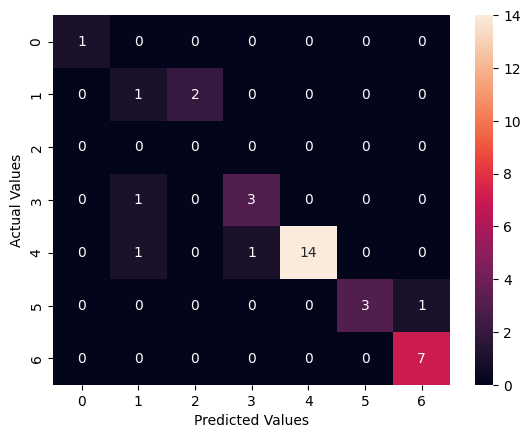

In [58]:
conf_mtx = confusion_matrix(y0_test, best_model0.predict(X0_test))
fig = plt.figure()
sns.heatmap(conf_mtx, annot=True)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

Se muestran los casos donde el valor predicho difiere del valor real en el modelo.

In [59]:
y_pred = best_model0.predict(X0_test)
y_pred = np.array(y_pred)

for i in range(len(y0_test)):
    if y_pred[i] != y0_test['decoded'][i]:
        index = y0_test.index[i]  # Índice real
        true_value = y0_test['decoded'][i]
        print(f"Index: {index}, True Value: {true_value}, Predicted Value: {y_pred[i]}")

Index: 76, True Value: 64, Predicted Value: 40
Index: 229, True Value: 40, Predicted Value: 32
Index: 219, True Value: 64, Predicted Value: 32
Index: 233, True Value: 66, Predicted Value: 72
Index: 026_r1, True Value: 32, Predicted Value: 36
Index: 025_r1, True Value: 32, Predicted Value: 36


El modelo se confunde en varios casos, por ejemplo, confunde un compuesto (ID 76) que solo tiene hidroxamato (1000000), con un compuesto que tiene hidroxamato y carboxilato (101000), y así se muestran los demás casos.



Para calcular las diferentes metricas, hay formas para promediar los resultados en las múltiples clases, por lo tanto, se usan:
- Macro-average, ya que permite que incluso las clases menos representativas tengan el mismo peso que las clases más comunes.
- Weighted-average, ya que calcula la métrica para cada clase de forma independiente pero al promediar da a cada clase un peso proporcional a su número de ocurrencias en los datos, y esto ayuda a equilibrar el impacto de las clases más o menos representadas.

In [60]:
# Macro-average
precision_macro = precision_score(y0_test, y_pred, average='macro')
recall_macro = recall_score(y0_test, y_pred, average='macro')
f1_macro = f1_score(y0_test, y_pred, average='macro')

print(f"\nMacro-average Precision: {precision_macro:.3f}")
print(f"Macro-average Recall: {recall_macro:.3f}")
print(f"Macro-average F1-Score: {f1_macro:.3f}")


Macro-average Precision: 0.708
Macro-average Recall: 0.673
Macro-average F1-Score: 0.687


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [61]:
# Weighted-average
precision_weighted = precision_score(y0_test, y_pred, average='weighted')
recall_weighted = recall_score(y0_test, y_pred, average='weighted')
f1_weighted = f1_score(y0_test, y_pred, average='weighted')

print(f"\nWeighted-average Precision: {precision_weighted:.3f}")
print(f"Weighted-average Recall: {recall_weighted:.3f}")
print(f"Weighted-average F1-Score: {f1_weighted:.3f}")


Weighted-average Precision: 0.889
Weighted-average Recall: 0.829
Weighted-average F1-Score: 0.854


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Método 2**

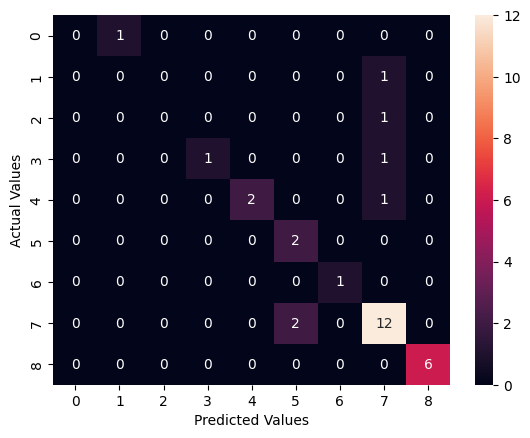

In [62]:
conf_mtx2 = confusion_matrix(y1_test, best_model1.predict(X1_test))
fig = plt.figure()
sns.heatmap(conf_mtx2, annot=True)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

Ahora, se muestran los casos donde el valor predicho difiere del valor real en el modelo.

In [63]:
y_pr = best_model1.predict(X1_test)
y_pr = np.array(y_pr)

for i in range(len(y1_test)):
    if y_pr[i] != y1_test['decoded'][i]:
        index = y1_test.index[i]  # Índice real
        true_value = y1_test['decoded'][i]
        print(f"Index: {index}, True Value: {true_value}, Predicted Value: {y_pred[i]}")

Index: 238, True Value: 200000, Predicted Value: 64
Index: 177, True Value: 300000, Predicted Value: 64
Index: 9, True Value: 1100, Predicted Value: 64
Index: 97, True Value: 3000000, Predicted Value: 32
Index: 228, True Value: 201000, Predicted Value: 64
Index: 200, True Value: 101000, Predicted Value: 72
Index: 92, True Value: 3000000, Predicted Value: 64


Al igual que con método anterior, este modelo se confunde en varios casos, por ejemplo, confunde un compuesto (ID 238) que en realidad tiene 2 hidroxamatos (2000000), con un compuesto que tiene 1 hidroxamato (100000), y así también se muestran los demás casos.

Se usan macro-average y weighted-average para calcular las métricas.

In [64]:
# Macro-average
precision_macro = precision_score(y1_test, y_pr, average='macro')
recall_macro = recall_score(y1_test, y_pr, average='macro')
f1_macro = f1_score(y1_test, y_pr, average='macro')

print(f"\nMacro-average Precision: {precision_macro:.3f}")
print(f"Macro-average Recall: {recall_macro:.3f}")
print(f"Macro-average F1-Score: {f1_macro:.3f}")


Macro-average Precision: 0.583
Macro-average Recall: 0.558
Macro-average F1-Score: 0.548


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [65]:
# Weighted-average
precision_weighted = precision_score(y1_test, y_pr, average='weighted')
recall_weighted = recall_score(y1_test, y_pr, average='weighted')
f1_weighted = f1_score(y1_test, y_pr, average='weighted')

print(f"\nWeighted-average Precision: {precision_weighted:.3f}")
print(f"Weighted-average Recall: {recall_weighted:.3f}")
print(f"Weighted-average F1-Score: {f1_weighted:.3f}")


Weighted-average Precision: 0.758
Weighted-average Recall: 0.774
Weighted-average F1-Score: 0.751


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##Discusión

Para clasificar los compuestos que contengan los grupos funcionales mostrados, se obtiene una precisión de hasta el 82.9%  usando el clasificador Naive Bayes con los hiperparámetros mostrados.

Por otro lado, para determinar la cantidad de grupos funcionales que contiene cada compuesto, la precisión baja a un 77.4% con el clasificador Naive Bayes.

En ambos casos, con el clasificador KNN no se obtuvieron tan buenos resultados, aunque mejoraron al identificar la cantidad de grupos funcionales en comparación con la presencia o no de los grupos.

Al intentar tunear los hiperparámetros en los modelos, ya sea usando RandomizedSearchCV o GridSearchCV, no se logró optimizar los hiperparámetros, ya sea porque la cantidad de parametros era insuficiente (1 en el caso de Naive Bayes), o sino porque genera un overfitting en el modelo (como se visualizo al usar KNN). Esto se debe en parte a que Naive Bayes es un modelo simple, y no logra beneficiarse tanto del ajuste de hiperparámetros como modelos más complejos. En el caso de KNN, este clasificador depende de la distancia entre los puntos de datos para hacer predicciones, y si las características no están normalizadas, aquellas con rangos más grandes van a dominar la medida de distancia, lo que genera el overfitting, y así el modelo al final termina dependiendo de manera desproporcionada de ciertas características.

Asimismo, cabe resaltar que existió una mala distribución en la cantidad de muestras que existían para cada clase, ya que a pesar de eliminar las muestras que presentaban 5 occurencias o menos por clase, se tenían clases con gran cantidad de muestras, mientras que otras clases apenas llegaban a las 10 muestras. Por lo tanto, sería apropiado agregar mayor data a la base de datos, para que se puedan validar los modelos obtenidos de forma apropiada.

##Conclusiones

Se concluye que, aunque el clasificador Naive Bayes ofrece una eficacia notable en la identificación de grupos funcionales en los compuestos, con una precisión del 82.9%, enfrenta limitaciones al precisar la cantidad de estos grupos, donde la precisión desciende al 77.4%.

Por otro lado, a pesar de los esfuerzos por afinar los modelos mediante técnicas de ajuste de hiperparámetros, tales intervenciones no culminaron en mejoras destacables, lo que pone de manifiesto las restricciones de modelos simples y la complejidad inherente al equilibrar las características en el KNN.

Además, a futuro se debería ampliar del conjunto de datos para enriquecer la representatividad de todas las clases. Una adecuada preparación de datos con una selección y configuración meticulosa de modelos, podrá mejorar la capacidad predictiva en la clasificación de los grupos funcionales de los sideróforos.